# Chapter 12: Network Over-Provisioning - Throwing Hardware at the Problem

We know that selfish routing is inefficient. In Pigou's example, drivers clogged the fast road, making the average travel time **1.0 hour**, while a dictator could have achieved **0.75 hours**.

How do we fix this?
1.  **Central Control:** Force people to take specific routes (Hard, unpopular).
2.  **Tolls:** Charge money for the fast road (Complex to implement).
3.  **Over-Provisioning:** Just build wider roads or buy faster servers.

## The Theory of Resource Augmentation
In the tech industry, hardware is often cheaper than software complexity. Google and AWS often run their networks at low utilization to ensure speed.

**The Key Theorem:**
> If you **double the speed** (capacity) of every link in your network, the **Selfish Outcome** becomes *at least as good* as the **Optimal Outcome** of the original network.

In other words: **2x Hardware + Selfish Users $\ge$ 1x Hardware + Perfect Management.**

Let's test this "Brute Force" strategy with code.

--- Resource Augmentation Analysis ---
1. Original Network (Perfect Management): Cost = 0.75
2. Original Network (Selfish Users):      Cost = 1.0
3. Upgraded Network (Selfish Users):      Cost = 0.5

Comparison:
SUCCESS: The upgraded selfish network (0.5) beat the original optimal one (0.75)!


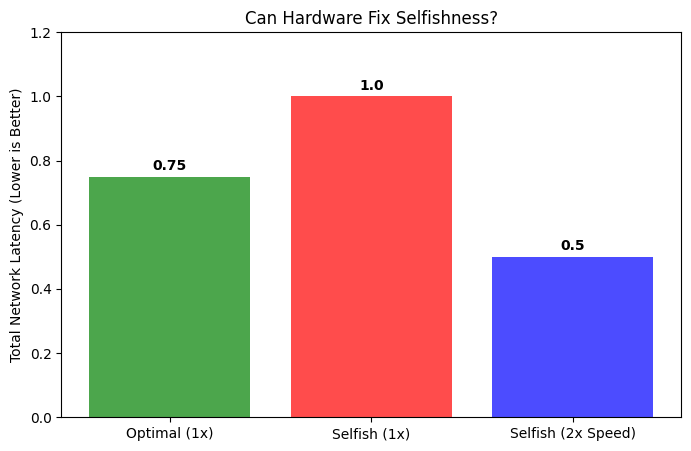

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def compare_capacities():
    """
    Compares:
    1. Optimal Routing (Original Network)
    2. Selfish Routing (Original Network)
    3. Selfish Routing (Double Capacity Network)
    """
    
    # --- SCENARIO 1: ORIGINAL NETWORK (Capacity 1x) ---
    # Path A: Latency = x (Linear congestion)
    # Path B: Latency = 1 (Constant)
    # Total Traffic = 1.0
    
    # We know from Chapter 11:
    # Optimal Split: 50/50. 
    # Optimal Cost: 0.5*0.5 + 0.5*1 = 0.75
    opt_cost_original = 0.75
    
    # Selfish Split: 100% take Path A.
    # Selfish Cost: 1.0 * 1.0 = 1.0
    nash_cost_original = 1.0
    
    # --- SCENARIO 2: UPGRADED NETWORK (Capacity 2x) ---
    # "Doubling Capacity" means Latency is HALVED for the same load.
    # Path A: Latency = x / 2
    # Path B: Latency = 1 / 2
    
    # New Selfish Equilibrium Calculation:
    # Drivers take Path A until Cost(A) = Cost(B)
    # x / 2 = 1 / 2
    # x = 1.0
    # Equilibrium: 100% take Path A.
    
    # Calculate Cost:
    # Traffic x = 1.0. 
    # Latency = 1.0 / 2 = 0.5
    nash_cost_upgraded = 1.0 * 0.5
    
    # --- RESULTS ---
    print(f"--- Resource Augmentation Analysis ---")
    print(f"1. Original Network (Perfect Management): Cost = {opt_cost_original}")
    print(f"2. Original Network (Selfish Users):      Cost = {nash_cost_original}")
    print(f"3. Upgraded Network (Selfish Users):      Cost = {nash_cost_upgraded}")
    
    print(f"\nComparison:")
    if nash_cost_upgraded <= opt_cost_original:
        print(f"SUCCESS: The upgraded selfish network (0.5) beat the original optimal one (0.75)!")
    else:
        print("FAIL: Adding hardware wasn't enough.")

    # --- VISUALIZATION ---
    labels = ['Optimal (1x)', 'Selfish (1x)', 'Selfish (2x Speed)']
    values = [opt_cost_original, nash_cost_original, nash_cost_upgraded]
    colors = ['green', 'red', 'blue']
    
    plt.figure(figsize=(8, 5))
    bars = plt.bar(labels, values, color=colors, alpha=0.7)
    
    # Add text labels
    for bar in bars:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2, yval + 0.02, round(yval, 2), ha='center', fontweight='bold')
        
    plt.ylabel("Total Network Latency (Lower is Better)")
    plt.title("Can Hardware Fix Selfishness?")
    plt.ylim(0, 1.2)
    plt.show()

compare_capacities()

### Analysis: Hardware vs. Management

The results are clear:
* **Original Optimal:** 0.75
* **Upgraded Selfish:** 0.50

By simply doubling the bandwidth, the "dumb" selfish outcome became **better** than the mathematically perfect outcome of the old system.

**Why is this important for Engineering?**
This explains why "Over-Provisioning" is a dominant strategy in network architecture.
* Designing complex protocols to enforce optimal routing is **expensive** and **fragile**.
* Buying 2x more fiber optic cable or 2x faster CPUs is **easy** and **robust**.

**The Takeaway:**
If the Price of Anarchy is low (like 4/3), you don't need to change human behavior. You just need slightly better infrastructure.